
# Import Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Standard plotly imports
import plotly.plotly as py
from plotly import tools
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode

# Using plotly + cufflinks in offline mode
import cufflinks as cf
cf.go_offline(connected=True)
init_notebook_mode(connected=True)

# Import Dataset

In [2]:
df=pd.read_csv("C:/DataScienceProjects/20190703 Client subscriptions/3. Uploaded Data/subsappdata.csv")

In [3]:
df.head(5)

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,SavingsCount,CMcount,CCCount,LoansCount
0,235136,3,2,23,15,0,0,0,0,0,...,0,0,0,0,0,7,0,0,0,1
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,5,0,0,0,1
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,234192,4,16,28,40,0,0,1,0,1,...,0,0,0,0,0,6,0,3,0,1
4,51549,1,18,31,32,0,0,1,1,0,...,0,0,0,0,0,10,0,2,0,1


# Pre-Processing

In [4]:
response = df['enrolled']
df = df.drop (columns=['enrolled'])

In [7]:
# Split dataset into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (df, response,
                                                    test_size = 0.2,
                                                    random_state = 0)

In [8]:
# Remove the user identifier column (which has no prediction power) and save it for later use
train_identifier = X_train['user']
X_train=X_train.drop(columns=['user'])
test_identifier = X_test['user']
X_test = X_test.drop(columns=['user'])

In [9]:
# Normalizing dataset while keeping features columns name and index
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train2 = pd.DataFrame(sc.fit_transform(X_train))
X_test2 = pd.DataFrame(sc.transform(X_test))

#Copying columns name
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values

#Copying index
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values

X_train = X_train2
X_test = X_test2

C:\Users\astei\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning:

Data with input dtype int64 were all converted to float64 by StandardScaler.

C:\Users\astei\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning:

Data with input dtype int64 were all converted to float64 by StandardScaler.

C:\Users\astei\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning:

Data with input dtype int64 were all converted to float64 by StandardScaler.



# Model building

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
clf = LogisticRegression(random_state=0, penalty = 'l1',solver='liblinear')
clf.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=0, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [12]:
y_pred =clf.predict(X_test)

In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
cm = confusion_matrix(y_test,y_pred)

In [14]:
accuracy_score(y_test,y_pred)

0.7681

In [15]:
precision_score(y_test,y_pred)

0.7618952017667135

In [16]:
recall_score(y_test,y_pred)

0.7700892857142857

In [17]:
f1_score(y_test,y_pred)

0.7659703300030276

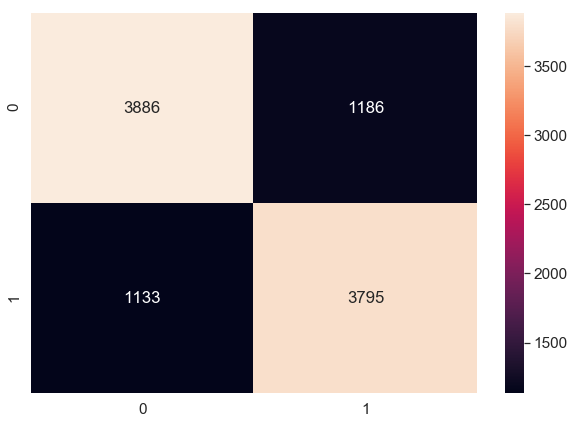

In [18]:
#PLotting confusion matrix
df_cm = pd.DataFrame (cm, index = (0,1), columns = (0,1))
plt.figure(figsize = (10,7))
sns.set(font_scale = 1.4)
sns.heatmap (df_cm, annot = True, fmt = 'g')
None

In [19]:
#Performing a cross_validation test to make sure the model is not overfitting. Although, we have a strong idea this is not the case based on previous metrics
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score (estimator = clf, X = X_train, y = y_train, cv = 10)
print ("logistic Accuracy: %0.3f (+/- %0.3f)" % (accuracies.mean(), accuracies.std() * 2))

logistic Accuracy: 0.767 (+/- 0.010)


# Formatting results

In [20]:
final_results = pd.concat([y_test,test_identifier], axis=1).dropna()
final_results['predicted_results']=y_pred
final_results[['user','enrolled','predicted_results']].reset_index(drop=True)

,user,enrolled,predicted_results
0,239786,1,1
1,279644,1,1
2,98290,0,0
3,170150,1,1
4,237568,1,1
5,65042,1,0
6,207226,1,1
7,363062,0,0
8,152296,1,1
9,64484,0,0


# Conclusion

We have managed to build a model that will label new users as "highly likely" to subscribe or not.:
Based on this, we should:
- further validate our model based on daily new installs and review the accuracy
- focus our marketing effort on users not likely to subscribe.
The success of this model can be measured by the increase in new subscribers.
Indeed, by giving great offers to users, e.g. first 3 months for free

# Optionnal: Model explanation

In [21]:
# Permutation importance
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(clf, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.1148 ± 0.0064,Other
0.0685 ± 0.0055,VerifyPhone
0.0402 ± 0.0013,CMcount
0.0176 ± 0.0062,LoansCount
0.0112 ± 0.0019,VerifyMobile
0.0106 ± 0.0030,VerifyCountry
0.0038 ± 0.0022,Alerts
0.0022 ± 0.0006,ResendToken
0.0016 ± 0.0024,idscreen
0.0011 ± 0.0013,ProfilePage


The table above highlights which features are important to our model by indicating how the performance is decreased while variables are permuted. The "other" variable seems to have the more impact.

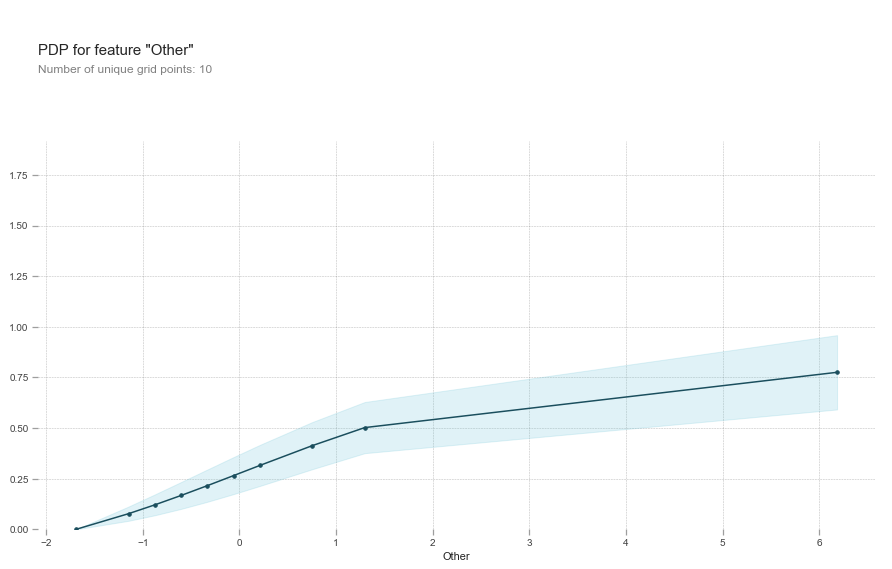

In [22]:
from pdpbox import pdp, get_dataset, info_plots

#Create a list of all nuemrical features
feature_names = X_test.columns.values

# Create the data that we will plot
pdp_goals = pdp.pdp_isolate(model=clf,
                            dataset=X_test,
                            model_features=feature_names,
                            feature='Other')



# plot it
pdp.pdp_plot(pdp_goals, 'Other')
plt.show()

Plot above highlight the impact on visiting the Other screens of the app on the likelihood to enroll showed on the y_axis.


In [23]:
X_test.describe()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked,location,Institutions,VerifyPhone,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,SavingsCount,CMcount,CCCount,LoansCount
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.010858,0.001039,0.000339,-0.010011,0.007187,-0.013614,-0.005383,-0.014661,-0.000439,-0.010013,...,0.004025,-0.011224,0.006559,-0.002764,0.001733,-0.014616,-0.015553,-0.008886,-0.008251,-0.012174
std,1.003015,0.999982,0.988697,1.006711,1.009098,0.988119,0.995176,1.000507,0.999851,1.000513,...,1.016481,0.951680,1.027573,0.984905,1.009859,0.986244,0.961976,0.997212,0.981109,0.998217
min,-1.489818,-1.688022,-1.452170,-1.281381,-0.346830,-0.457453,-0.445173,-1.039218,-0.644848,-1.052581,...,-0.119697,-0.117420,-0.115879,-0.091207,-0.087221,-1.690401,-0.260877,-0.763372,-0.289185,-1.165789
25%,-0.997389,-1.015807,-0.713323,-0.708408,-0.346830,-0.457453,-0.445173,-1.039218,-0.644848,-1.052581,...,-0.119697,-0.117420,-0.115879,-0.091207,-0.087221,-0.875753,-0.260877,-0.763372,-0.289185,-1.165789
50%,-0.012532,0.194179,-0.251543,-0.262762,-0.346830,-0.457453,-0.445173,0.962262,-0.644848,0.950046,...,-0.119697,-0.117420,-0.115879,-0.091207,-0.087221,-0.061105,-0.260877,-0.763372,-0.289185,0.309800
75%,0.972325,0.866394,0.487305,0.437538,-0.346830,-0.457453,-0.445173,0.962262,1.550753,0.950046,...,-0.119697,-0.117420,-0.115879,-0.091207,-0.087221,0.481993,-0.260877,0.057524,-0.289185,0.309800
max,1.464753,1.404166,6.398084,11.387686,2.883254,2.186018,2.246319,0.962262,1.550753,0.950046,...,8.354428,8.516420,8.629699,10.964129,11.465179,6.184529,6.800839,3.341109,4.588151,3.260979


In [24]:
print(df.Other.min(),df.Other.max(),df.Other.mean(),df.Other.median())

0 35 6.21426 6.0
